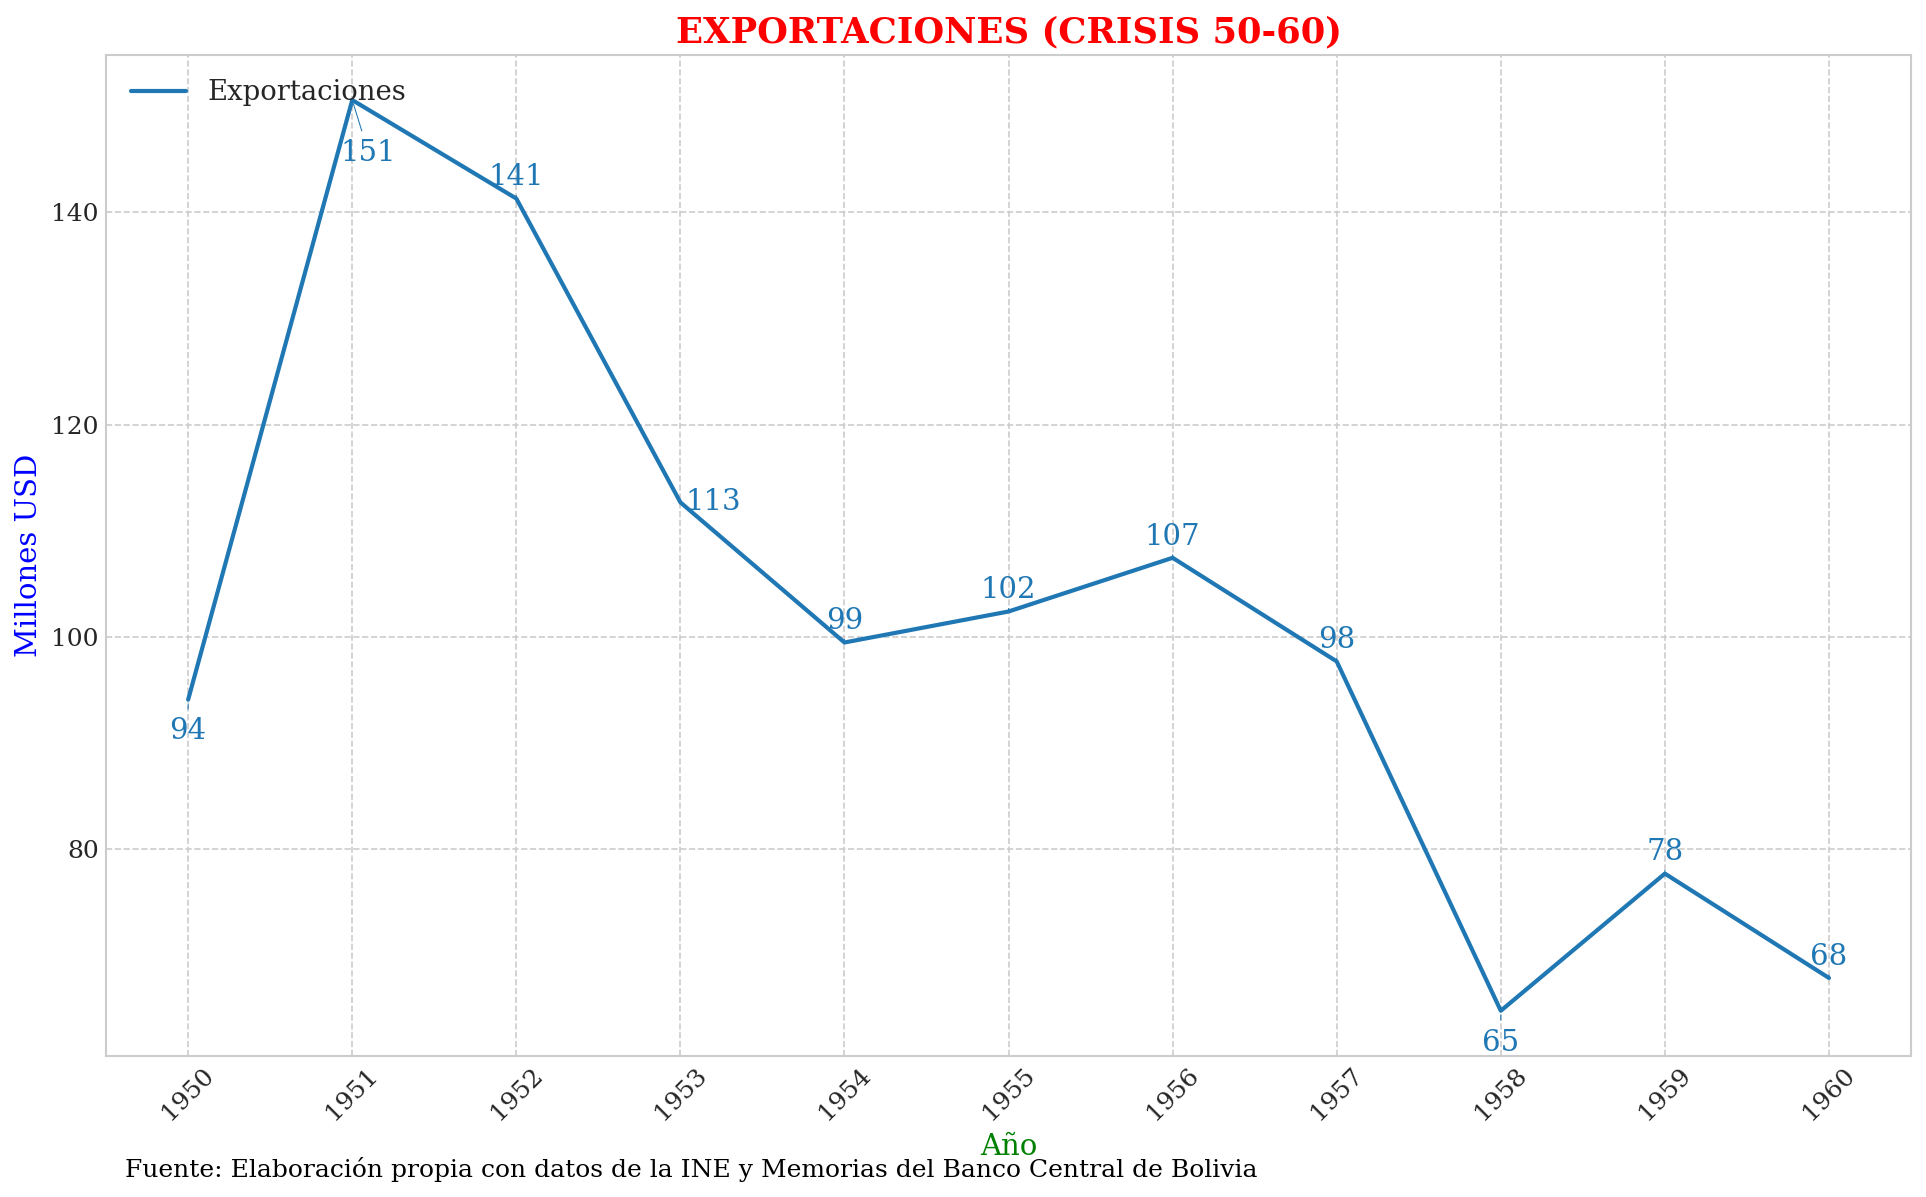

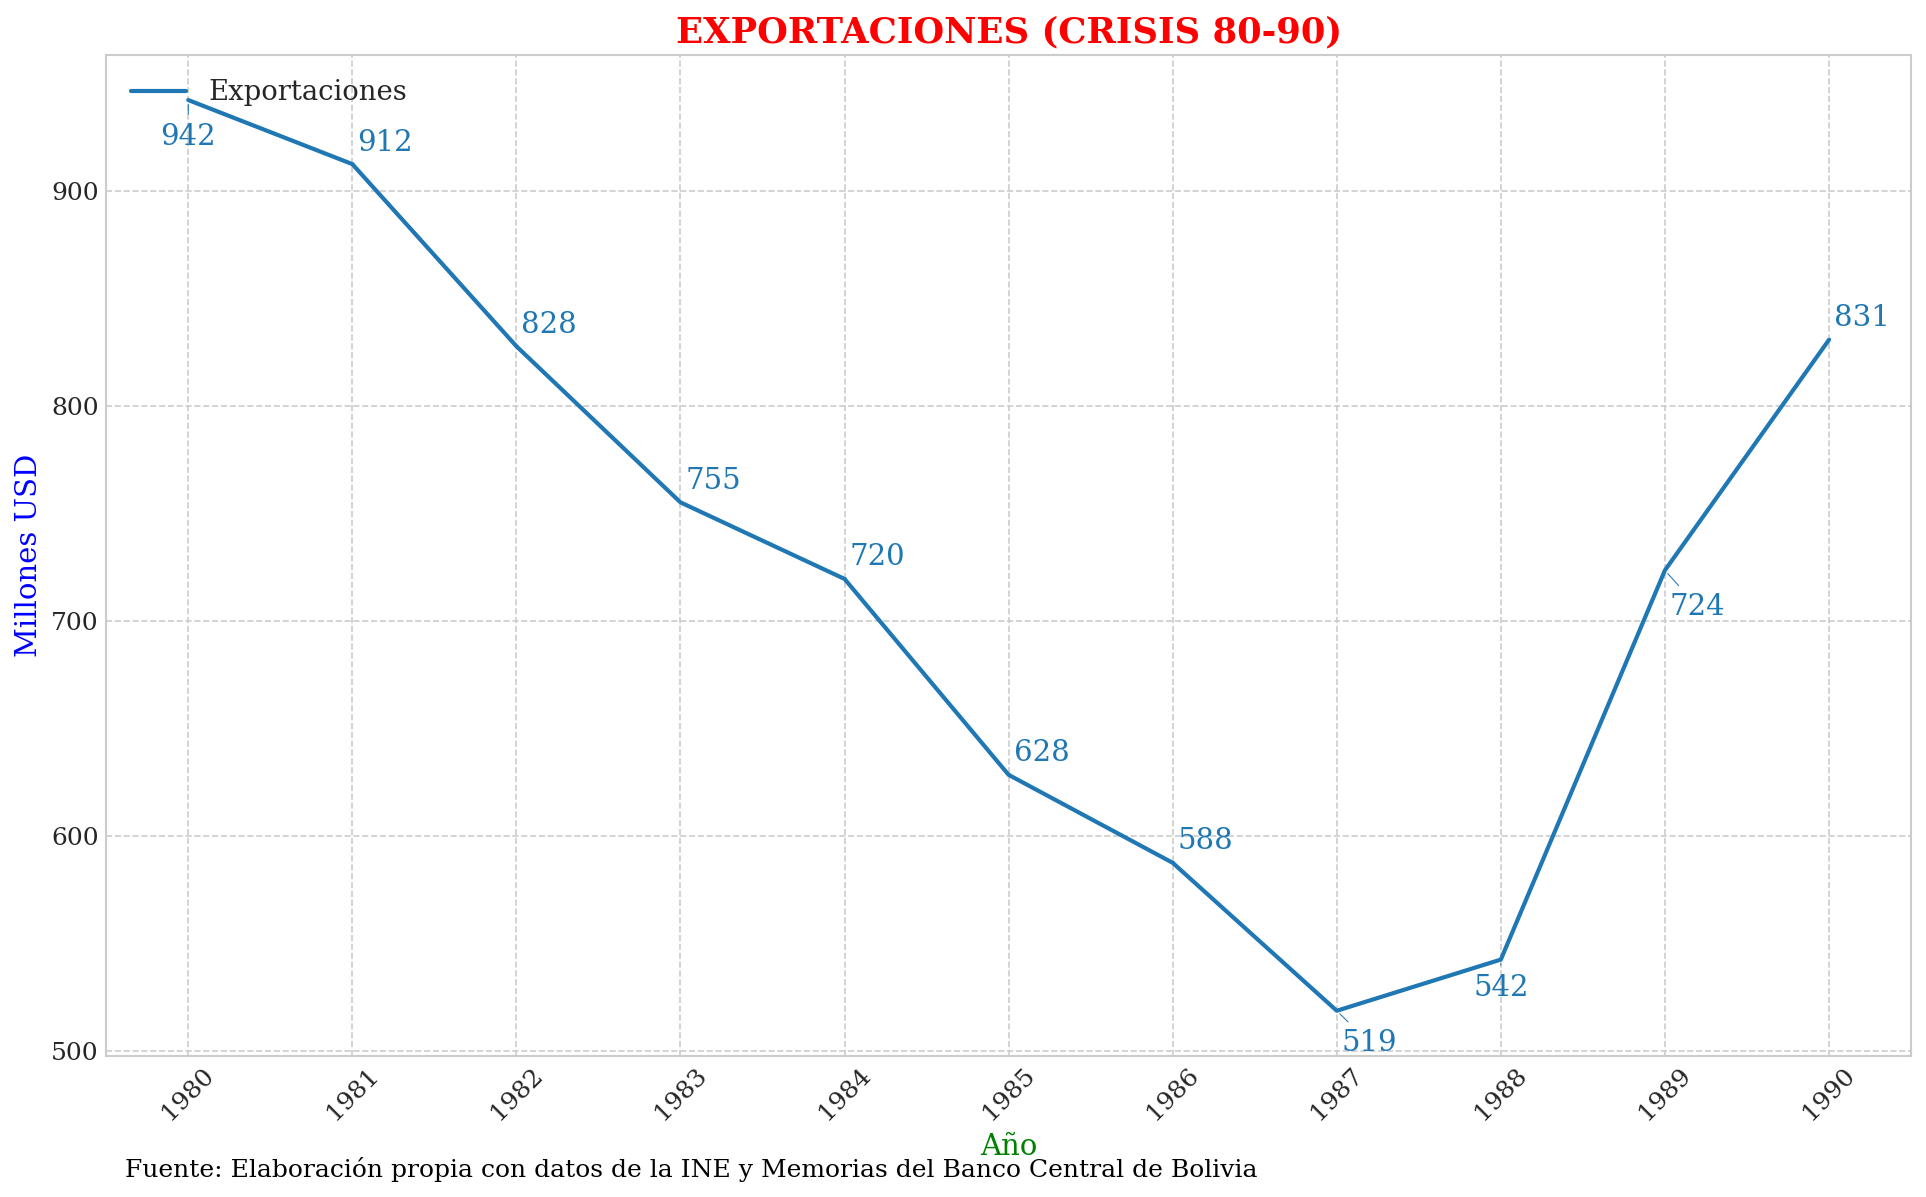

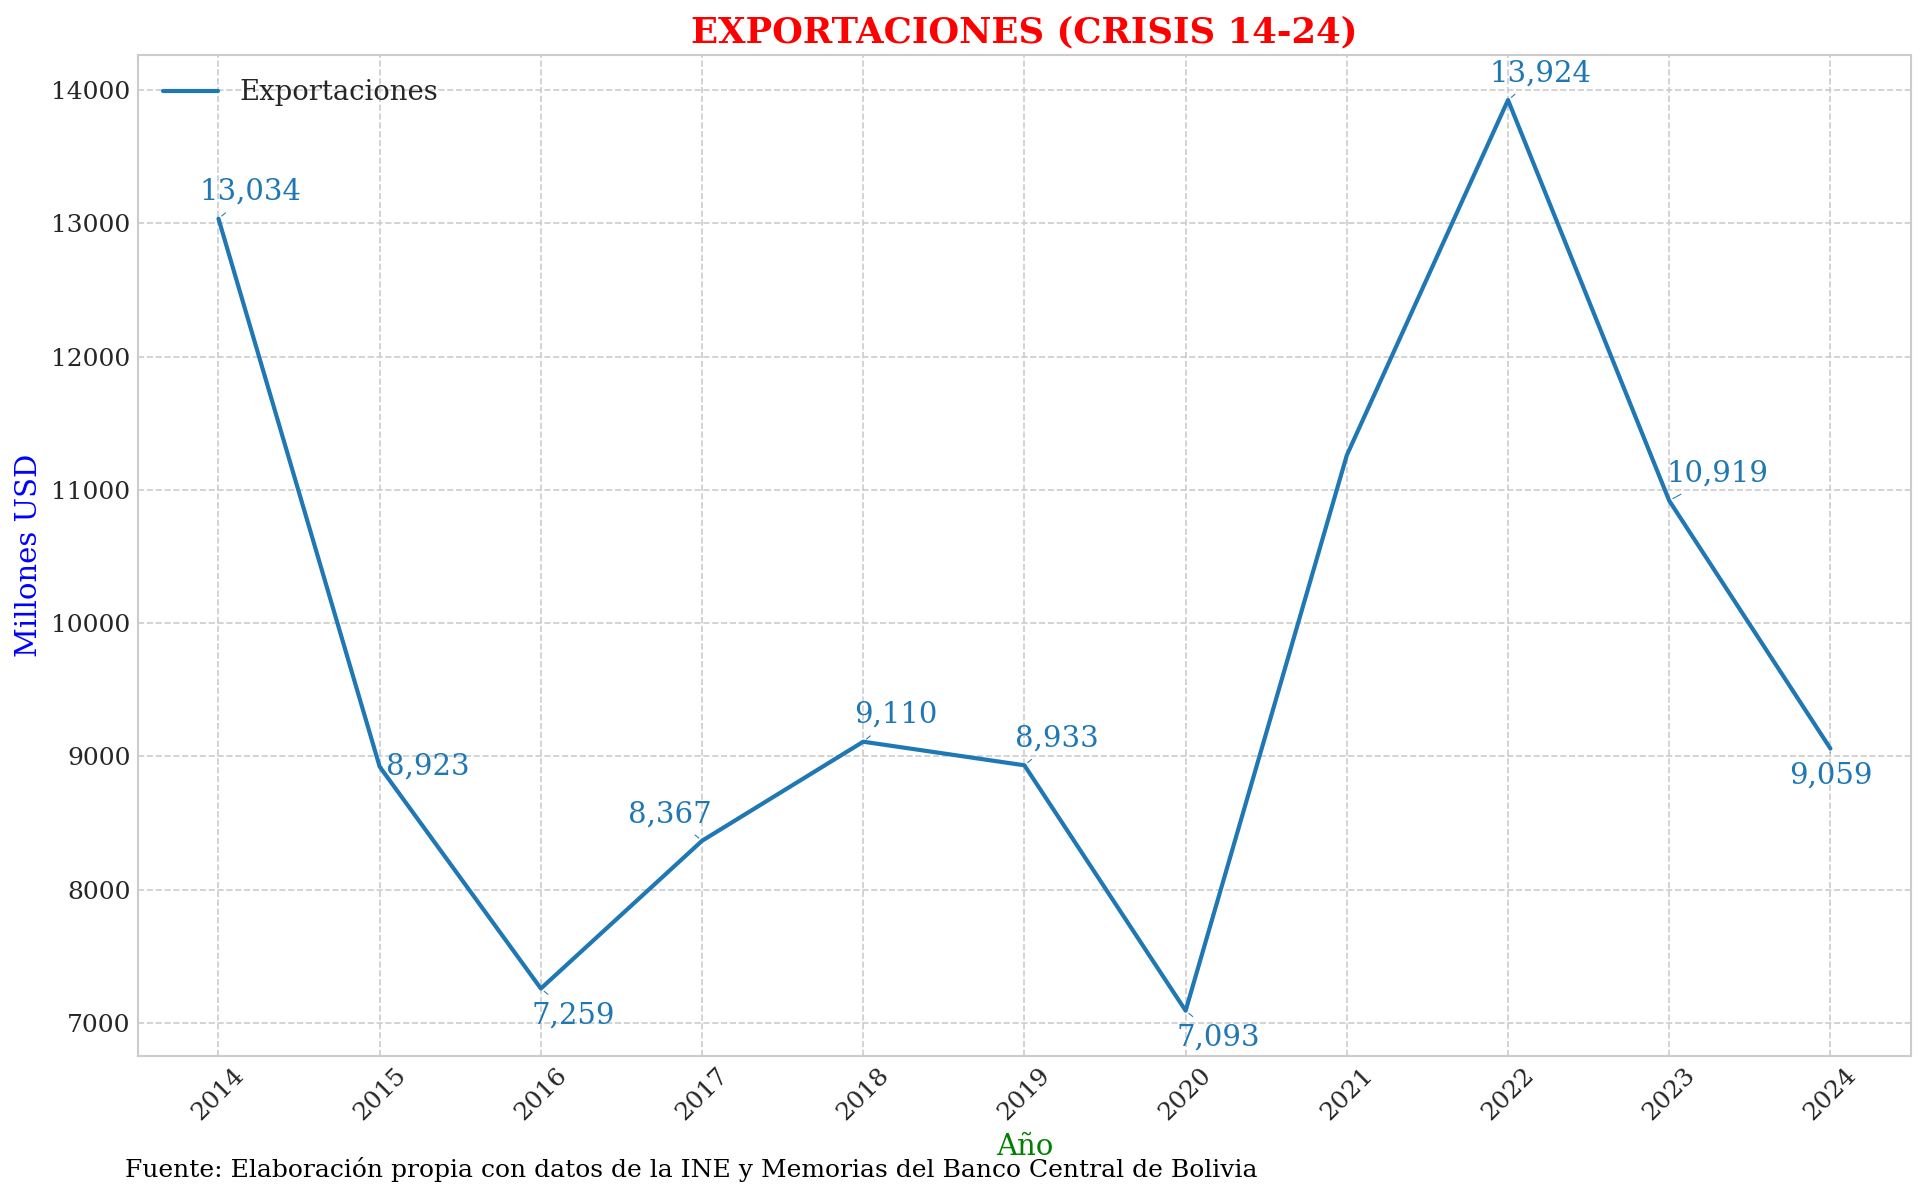

In [3]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot, add_year_value_annotations
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
# carpeta raíz de assets/tesis/serie_completa
output_dir = ASSETS_DIR / "crisis" / "exportaciones"
output_dir.mkdir(parents=True, exist_ok=True)

# aplica tu estilo corporativo
set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      exportaciones
    FROM balanza_comercial
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes = [("exportaciones", "Exportaciones")]
cols_componentes = [col for col, _ in componentes]
colors = {"exportaciones": "#1f77b4"}


annotation_offsets = {
    "exportaciones": {
        1950: (0,  -3),
        1951: (0.1,  -5),
        1952: (0,  2),
        1953: (0.2,  0),
        1954: (0,  2),
        1955: (0,  2),
        1956: (0,  2),
        1957: (0,  2),
        1958: (0, -3),  
        1959: (0,  2),
        1960: (0,  2),


        1980: (0,  -17),   
        1981: (0.2,  10),
        1982: (0.2,  10),
        1983: (0.2,  10),
        1984: (0.2,  10),
        1985: (0.2,  10),
        1986: (0.2,  10),
        1987: (0.2, -15),   
        1988: (0,  -13),
        1989: (0.2,  -17),
        1990: (0.2,  10),

        2014: (0.2,  200),  
        2015: (0.3,  0),   
        2016: (0.2, -200),   
        2017: (-0.2,  200),
        2018: (0.2,  200),
        2019: (0.2,  200),
        2020: (0.2, -200),   
        2022: (0.2,  200),
        2023: (0.3,  200),
        2024: (0,  -200),   
    }
}

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]
    if sub.empty:
        continue
    #si sub tiene solo 3 datos
    if len(sub) < 3:
        print(f"Subperíodo {nombre} tiene menos de 3 datos, omitiendo.")
        continue

    years_to_annot = list(sub.index)  # Aquí tomas los años directamente del índice del DataFrame
    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"EXPORTACIONES ({nombre.upper()})",
        xlabel="Año",
        ylabel="Millones USD",
        source_text="Fuente: Elaboración propia con datos de la INE y Memorias del Banco Central de Bolivia",
    )
    # 4) y aquí pasas years_to_annot en lugar de la lista global
    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,              # los años que quieres anotar
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.5,
    )
    # guarda con nombre descriptivo
    fig.savefig(output_dir / f"exportaciones_{nombre}.png")
    plt.show() 
    plt.close(fig)


In [7]:
df.min(), df.max()

(exportaciones    64.736
 dtype: float64,
 exportaciones    13924.2
 dtype: float64)